Ian Turner, Cole Hannum, Adam Goldstein, Seunghugh Kim, Hyunchae Kim


In [ ]:
#try this code if nba_api package does not load
!pip install nba_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from nba_api.stats.endpoints import teamdashboardbyshootingsplits

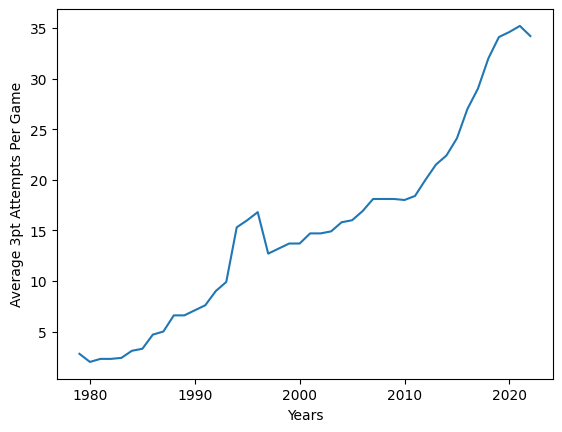

In [ ]:
sports_data = pd.read_csv('https://raw.githubusercontent.com/IanTurner19/Discussion2/main/sportsref_download.csv')


sports_data['Starting Year'] = sports_data['Season'].str.split('-').str[0].astype(int)


sports_data['Years After 1980'] = sports_data['Starting Year'] - 1980
plt.plot(sports_data['Starting Year'], sports_data['3PA']);
plt.xlabel("Years");
plt.ylabel("Average 3pt Attempts Per Game");



In [ ]:
sports_with3 = sports_data[sports_data['Starting Year'] > 1980].copy()
sports_with3['2P'] = sports_with3['FG'] - sports_with3['3P']
sports_with3['2PA'] = sports_with3['FGA'] - sports_with3['3PA']
sports_with3['2P%'] = sports_with3['2P'] / sports_with3['2PA']


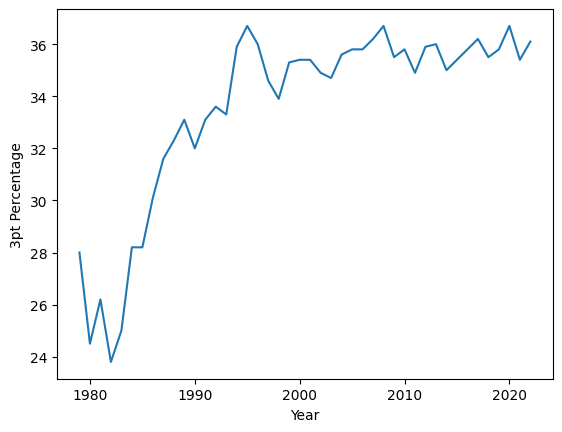

In [ ]:
plt.plot(sports_data['Starting Year'], sports_data['3P%']*100);
plt.xlabel("Year");
plt.ylabel("3pt Percentage");


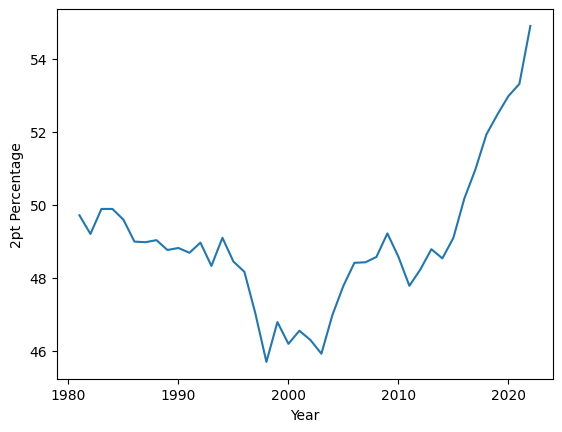

In [ ]:
plt.plot(sports_with3['Starting Year'], sports_with3['2P%']*100)
plt.xlabel("Year");
plt.ylabel("2pt Percentage");


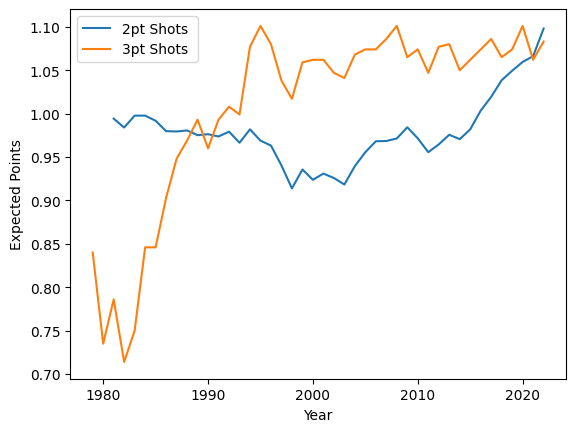

In [ ]:
plt.plot(sports_with3['Starting Year'], sports_with3['2P%']*2, label = '2pt Shots');
plt.plot(sports_data['Starting Year'], sports_data['3P%']*3, label = '3pt Shots ');
plt.xlabel("Year");
plt.ylabel("Expected Points");
plt.legend();

In [ ]:
loops = len(sports_with3['2P%'])

three_history = []
two_history = []
trials = 200


for k in range(loops):
  three_list2 = []
  two_list = []
  average_two = sports_with3['2P%'][k]*100
  average_three = sports_with3['3P%'][k]*100

  for j in range(trials):
    three_pters = 0
    two_pters = 0

    for i in range(100):
        two_shot = np.random.normal(average_two, 9)
        three_shot = np.random.normal(average_three, 7)

        if two_shot > three_shot * 1.5:
            two_pters += 1
        else:
            three_pters += 1
    three_list2.append(three_pters)
    two_list.append(two_pters)


  three_history.append(np.mean(three_list2))
  two_history.append(100 - (np.mean(three_list2)))


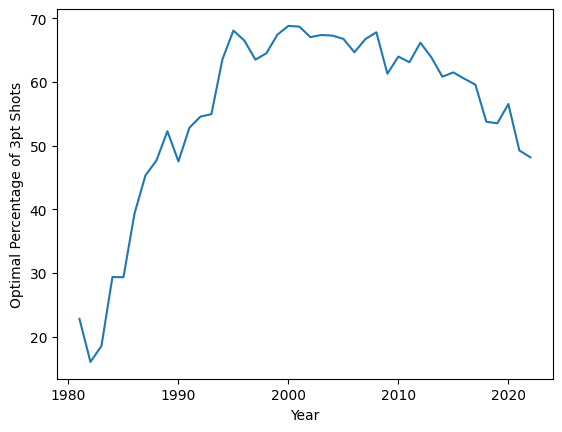

In [ ]:
plt.plot(sports_with3['Starting Year'], three_history);
plt.xlabel('Year');
plt.ylabel('Optimal Percentage of 3pt Shots');

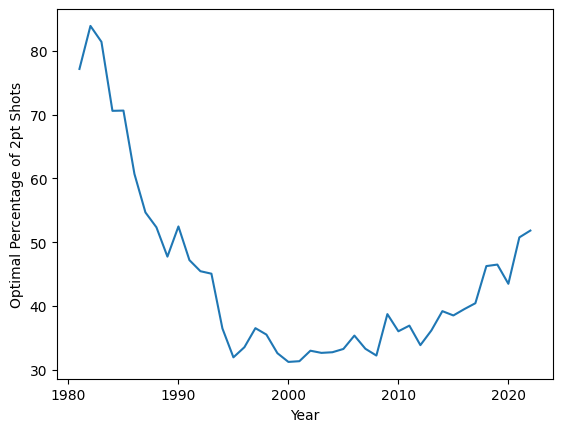

In [ ]:
plt.plot(sports_with3['Starting Year'], two_history);
plt.xlabel('Year');
plt.ylabel('Optimal Percentage of 2pt Shots');

In [ ]:

x = len(sports_with3['2P%'])
expected_scoring = [0]*x
for i in range(x):
  y = (sports_with3['2P%'][i]*two_history[i]*2) + (sports_with3['3P%'][i]*three_history[i]*3)
  expected_scoring[i] = y


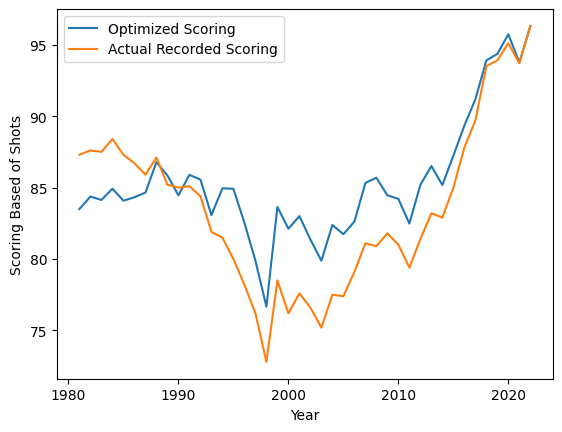

In [ ]:
plt.plot(sports_with3['Starting Year'], expected_scoring*(sports_with3['FGA']/100), label = 'Optimized Scoring');
plt.plot(sports_with3['Starting Year'], sports_with3['PTS'] - sports_with3['FT'], label = 'Actual Recorded Scoring');
plt.xlabel('Year')
plt.ylabel('Scoring Based of Shots');
plt.legend();

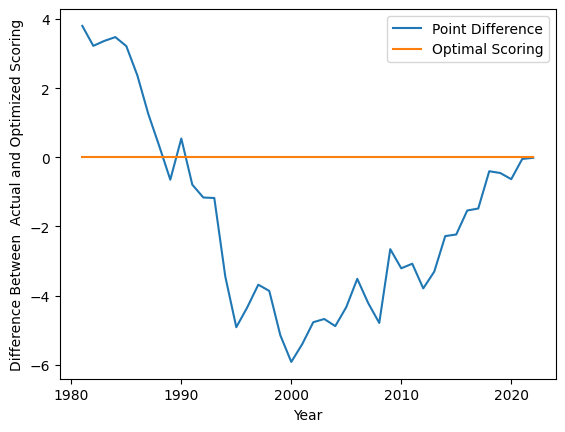

In [ ]:
plt.plot(sports_with3['Starting Year'],  (sports_with3['PTS'] - sports_with3['FT']) - (expected_scoring*(sports_with3['FGA']/100)), label = "Point Difference");
plt.plot(sports_with3['Starting Year'], [0]*len(sports_with3['Starting Year']), label = 'Optimal Scoring')
plt.xlabel('Year');
plt.ylabel('Difference Between  Actual and Optimized Scoring');
plt.legend();


In [ ]:
#Atlanta Hawks
ATLdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612737,season='2022-23', season_type_all_star = 'Regular Season')
ATLdf = ATLdata.shot_area_team_dashboard.get_data_frame()
#Boston Celtics
BOSdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612738,season='2022-23', season_type_all_star = 'Regular Season')
BOSdf = BOSdata.shot_area_team_dashboard.get_data_frame()
#Brooklyn Nets
BKNdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612751,season='2022-23', season_type_all_star = 'Regular Season')
BKNdf = BKNdata.shot_area_team_dashboard.get_data_frame()
#Charlotte Hornets
CHAdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612766,season='2022-23', season_type_all_star = 'Regular Season')
CHAdf = CHAdata.shot_area_team_dashboard.get_data_frame()
#Chicago Bulls
CHIdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612741,season='2022-23', season_type_all_star = 'Regular Season')
CHIdf = CHIdata.shot_area_team_dashboard.get_data_frame()


In [ ]:
#Cleveland Cavaliers
CLEdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612739,season='2022-23', season_type_all_star = 'Regular Season')
CLEdf = CLEdata.shot_area_team_dashboard.get_data_frame()
#Dallas Mavericks
DALdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612742,season='2022-23', season_type_all_star = 'Regular Season')
DALdf = DALdata.shot_area_team_dashboard.get_data_frame()
#Denver Nuggets
DENdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612743,season='2022-23', season_type_all_star = 'Regular Season')
DENdf = DENdata.shot_area_team_dashboard.get_data_frame()
#Detroit Pistons
DETdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612765,season='2022-23', season_type_all_star = 'Regular Season')
DETdf = DETdata.shot_area_team_dashboard.get_data_frame()
#Golden State Warriors
GSWdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612744,season='2022-23', season_type_all_star = 'Regular Season')
GSWdf = GSWdata.shot_area_team_dashboard.get_data_frame()

In [ ]:
#Houston Rockets
HOUdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612745,season='2022-23', season_type_all_star = 'Regular Season')
HOUdf = HOUdata.shot_area_team_dashboard.get_data_frame()
#Indiana Pacers
INDdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612754,season='2022-23', season_type_all_star = 'Regular Season')
INDdf = INDdata.shot_area_team_dashboard.get_data_frame()
#Los Angeles Clippers
LACdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612746,season='2022-23', season_type_all_star = 'Regular Season')
LACdf = LACdata.shot_area_team_dashboard.get_data_frame()
#Los Angeles Lakers
LALdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612747,season='2022-23', season_type_all_star = 'Regular Season')
LALdf = LALdata.shot_area_team_dashboard.get_data_frame()
#Memphis Grizzlies
MEMdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612763,season='2022-23', season_type_all_star = 'Regular Season')
MEMdf = MEMdata.shot_area_team_dashboard.get_data_frame()


In [ ]:
#Miami Heat
MIAdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612748,season='2022-23', season_type_all_star = 'Regular Season')
MIAdf = MIAdata.shot_area_team_dashboard.get_data_frame()
#Milwaukee Bucks
MILdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612749,season='2022-23', season_type_all_star = 'Regular Season')
MILdf = MILdata.shot_area_team_dashboard.get_data_frame()
#Minenesota Timberwolves
MINdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612750,season='2022-23', season_type_all_star = 'Regular Season')
MINdf = MINdata.shot_area_team_dashboard.get_data_frame()
#New Orleans Pelicans
NOPdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612740,season='2022-23', season_type_all_star = 'Regular Season')
NOPdf = NOPdata.shot_area_team_dashboard.get_data_frame()
#New York Knicks
NYKdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612752,season='2022-23', season_type_all_star = 'Regular Season')
NYKdf = NYKdata.shot_area_team_dashboard.get_data_frame()

In [ ]:
#Oklahoma City Thunder
OKCdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612760,season='2022-23', season_type_all_star = 'Regular Season')
OKCdf = OKCdata.shot_area_team_dashboard.get_data_frame()
#Orlando Magic
ORLdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612753,season='2022-23', season_type_all_star = 'Regular Season')
ORLdf = ORLdata.shot_area_team_dashboard.get_data_frame()
#Philadelphia 76ers
PHIdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612755,season='2022-23', season_type_all_star = 'Regular Season')
PHIdf = PHIdata.shot_area_team_dashboard.get_data_frame()
#Phoenix Suns
PHXdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612756,season='2022-23', season_type_all_star = 'Regular Season')
PHXdf = PHXdata.shot_area_team_dashboard.get_data_frame()
#Portland Trail Blazers
PORdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612757,season='2022-23', season_type_all_star = 'Regular Season')
PORdf = PORdata.shot_area_team_dashboard.get_data_frame()


In [ ]:
#Sacramento Kings
SACdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612758,season='2022-23', season_type_all_star = 'Regular Season')
SACdf = SACdata.shot_area_team_dashboard.get_data_frame()
#San Antonio Spurs
SASdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612759,season='2022-23', season_type_all_star = 'Regular Season')
SASdf = SASdata.shot_area_team_dashboard.get_data_frame()
#Toronto Raptors
TORdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612761,season='2022-23', season_type_all_star = 'Regular Season')
TORdf = TORdata.shot_area_team_dashboard.get_data_frame()
#Utah Jazz
UTAdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612762,season='2022-23', season_type_all_star = 'Regular Season')
UTAdf = UTAdata.shot_area_team_dashboard.get_data_frame()
#Washington Wizards
WASdata = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612764,season='2022-23', season_type_all_star = 'Regular Season')
WASdf = WASdata.shot_area_team_dashboard.get_data_frame()

In [ ]:
NBAdf= ATLdf[['GROUP_VALUE', 'FGM', 'FGA']]
NBAdf[['FGM', 'FGA']] = ATLdf[['FGM', 'FGA']] + BOSdf[['FGM', 'FGA']] + BKNdf[['FGM', 'FGA']] + CHAdf[['FGM', 'FGA']] + CHIdf[['FGM', 'FGA']] + \
CLEdf[['FGM', 'FGA']] + DALdf[['FGM', 'FGA']] + DENdf[['FGM', 'FGA']] + DETdf[['FGM', 'FGA']] + GSWdf[['FGM', 'FGA']] + HOUdf[['FGM', 'FGA']] + \
INDdf[['FGM', 'FGA']] + LACdf[['FGM', 'FGA']] + LALdf[['FGM', 'FGA']] + MEMdf[['FGM', 'FGA']] + MIAdf[['FGM', 'FGA']] + MILdf[['FGM', 'FGA']] + \
MINdf[['FGM', 'FGA']] + NOPdf[['FGM', 'FGA']] + NYKdf[['FGM', 'FGA']] + OKCdf[['FGM', 'FGA']] + ORLdf[['FGM', 'FGA']] + PHIdf[['FGM', 'FGA']] + \
PHXdf[['FGM', 'FGA']] + PORdf[['FGM', 'FGA']] + SACdf[['FGM', 'FGA']] + SASdf[['FGM', 'FGA']] + TORdf[['FGM', 'FGA']] + UTAdf[['FGM', 'FGA']] + WASdf[['FGM', 'FGA']]
NBAdf['FG%'] = NBAdf['FGM'] / NBAdf['FGA']
NBAdf2 = NBAdf.iloc[:3,:]
NBAdf3 = NBAdf.iloc[3:,:]
NBAdf2['Expected Points'] = NBAdf2['FG%'] * 2
NBAdf3['Expected Points'] = NBAdf3['FG%'] * 3
NBAdf = pd.concat([NBAdf2, NBAdf3])
NBAdf.rename(columns = {'GROUP_VALUE' : 'Zone'}, inplace = True)
NBAdf

<ipython-input-22-75da21fac669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBAdf[['FGM', 'FGA']] = ATLdf[['FGM', 'FGA']] + BOSdf[['FGM', 'FGA']] + BKNdf[['FGM', 'FGA']] + CHAdf[['FGM', 'FGA']] + CHIdf[['FGM', 'FGA']] + \
<ipython-input-22-75da21fac669>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBAdf['FG%'] = NBAdf['FGM'] / NBAdf['FGA']
<ipython-input-22-75da21fac669>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Zone,FGM,FGA,FG%,Expected Points
0,Restricted Area,43298,64983,0.666297,1.332595
1,In The Paint (Non-RA),18827,42441,0.443604,0.887208
2,Mid-Range,10831,25760,0.420458,0.840916
3,Left Corner 3,4262,11066,0.385144,1.155431
4,Right Corner 3,3831,9939,0.385451,1.156354
5,Above the Break 3,22201,62625,0.354507,1.063521
6,Backcourt,10,406,0.024631,0.073892


#Fitting Shot distance vs Field Goal Percentage

In [ ]:
#Atlanta hawks
ATLdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612737,season='2022-23', season_type_all_star = 'Regular Season')
ATLdf2 = ATLdata2.shot5_ft_team_dashboard.get_data_frame()
#Boston Celtics
BOSdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612738,season='2022-23', season_type_all_star = 'Regular Season')
BOSdf2 = BOSdata2.shot5_ft_team_dashboard.get_data_frame()
#Brooklyn Nets
BKNdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612751,season='2022-23', season_type_all_star = 'Regular Season')
BKNdf2 = BKNdata2.shot5_ft_team_dashboard.get_data_frame()
#Charlotte Hornets
CHAdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612766,season='2022-23', season_type_all_star = 'Regular Season')
CHAdf2 = CHAdata2.shot5_ft_team_dashboard.get_data_frame()
#Chicago Bulls
CHIdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612741,season='2022-23', season_type_all_star = 'Regular Season')
CHIdf2 = CHIdata2.shot5_ft_team_dashboard.get_data_frame()


In [ ]:
#Cleveland Cavaliers
CLEdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612739,season='2022-23', season_type_all_star = 'Regular Season')
CLEdf2 = CLEdata2.shot5_ft_team_dashboard.get_data_frame()
#Dallas Mavericks
DALdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612742,season='2022-23', season_type_all_star = 'Regular Season')
DALdf2 = DALdata2.shot5_ft_team_dashboard.get_data_frame()
#Denver Nuggets
DENdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612743,season='2022-23', season_type_all_star = 'Regular Season')
DENdf2 = DENdata2.shot5_ft_team_dashboard.get_data_frame()
#Detroit Pistons
DETdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612765,season='2022-23', season_type_all_star = 'Regular Season')
DETdf2 = DETdata2.shot5_ft_team_dashboard.get_data_frame()
#Golden State Warriors
GSWdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612744,season='2022-23', season_type_all_star = 'Regular Season')
GSWdf2 = GSWdata2.shot5_ft_team_dashboard.get_data_frame()


In [ ]:
#Houston Rockets
HOUdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612745,season='2022-23', season_type_all_star = 'Regular Season')
HOUdf2 = HOUdata2.shot5_ft_team_dashboard.get_data_frame()
#Indiana Pacers
INDdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612754,season='2022-23', season_type_all_star = 'Regular Season')
INDdf2 = INDdata2.shot5_ft_team_dashboard.get_data_frame()
#Los Angeles Clippers
LACdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612746,season='2022-23', season_type_all_star = 'Regular Season')
LACdf2 = LACdata2.shot5_ft_team_dashboard.get_data_frame()
#Los Angeles Lakers
LALdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612747,season='2022-23', season_type_all_star = 'Regular Season')
LALdf2 = LALdata2.shot5_ft_team_dashboard.get_data_frame()
#Memphis Grizzlies
MEMdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612763,season='2022-23', season_type_all_star = 'Regular Season')
MEMdf2 = MEMdata2.shot5_ft_team_dashboard.get_data_frame()


In [ ]:
#Miami Heat
MIAdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612748,season='2022-23', season_type_all_star = 'Regular Season')
MIAdf2 = MIAdata2.shot5_ft_team_dashboard.get_data_frame()
#Milwaukee Bucks
MILdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612749,season='2022-23', season_type_all_star = 'Regular Season')
MILdf2 = MILdata2.shot5_ft_team_dashboard.get_data_frame()
#Minenesota Timberwolves
MINdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612750,season='2022-23', season_type_all_star = 'Regular Season')
MINdf2 = MINdata2.shot5_ft_team_dashboard.get_data_frame()
#New Orleans Pelicans
NOPdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612740,season='2022-23', season_type_all_star = 'Regular Season')
NOPdf2 = NOPdata2.shot5_ft_team_dashboard.get_data_frame()
#New York Knicks
NYKdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612752,season='2022-23', season_type_all_star = 'Regular Season')
NYKdf2 = NYKdata2.shot5_ft_team_dashboard.get_data_frame()


In [ ]:
#Oklahoma City Thunder
OKCdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612760,season='2022-23', season_type_all_star = 'Regular Season')
OKCdf2 = OKCdata2.shot5_ft_team_dashboard.get_data_frame()
#Orlando Magic
ORLdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612753,season='2022-23', season_type_all_star = 'Regular Season')
ORLdf2 = ORLdata2.shot5_ft_team_dashboard.get_data_frame()
#Philadelphia 76ers
PHIdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612755,season='2022-23', season_type_all_star = 'Regular Season')
PHIdf2 = PHIdata2.shot5_ft_team_dashboard.get_data_frame()
#Phoenix Suns
PHXdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612756,season='2022-23', season_type_all_star = 'Regular Season')
PHXdf2 = PHXdata2.shot5_ft_team_dashboard.get_data_frame()
#Portland Trail Blazers
PORdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612757,season='2022-23', season_type_all_star = 'Regular Season')
PORdf2 = PORdata2.shot5_ft_team_dashboard.get_data_frame()


In [ ]:
#Sacramento Kings
SACdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612758,season='2022-23', season_type_all_star = 'Regular Season')
SACdf2 = SACdata2.shot5_ft_team_dashboard.get_data_frame()
#San Antonio Spurs
SASdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612759,season='2022-23', season_type_all_star = 'Regular Season')
SASdf2 = SASdata2.shot5_ft_team_dashboard.get_data_frame()
#Toronto Raptors
TORdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612761,season='2022-23', season_type_all_star = 'Regular Season')
TORdf2 = TORdata2.shot5_ft_team_dashboard.get_data_frame()
#Utah Jazz
UTAdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612762,season='2022-23', season_type_all_star = 'Regular Season')
UTAdf2 = UTAdata2.shot5_ft_team_dashboard.get_data_frame()
#Washington Wizards
WASdata2 = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(team_id = 1610612764,season='2022-23', season_type_all_star = 'Regular Season')
WASdf2 = WASdata2.shot5_ft_team_dashboard.get_data_frame()

<ipython-input-51-c8ede6c5a92b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBAdf2.loc[:,'Avg_Distance_ft'] = distance
<ipython-input-51-c8ede6c5a92b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBAdf2[['FGM', 'FGA']] = ATLdf2[['FGM', 'FGA']] + BOSdf2[['FGM', 'FGA']] + BKNdf2[['FGM', 'FGA']] + CHAdf2[['FGM', 'FGA']] + CHIdf2[['FGM', 'FGA']] + \
<ipython-input-51-c8ede6c5a92b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Text(0.5, 1.0, 'FG% vs Distance')

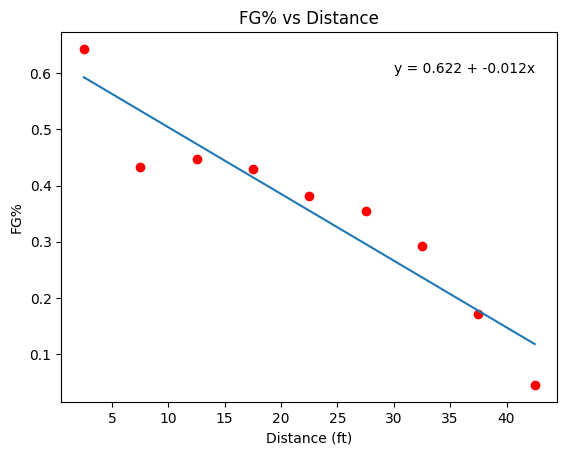

In [ ]:

NBAdf2= ATLdf2[['GROUP_VALUE', 'FGM', 'FGA']]
distance = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]
NBAdf2.loc[:,'Avg_Distance_ft'] = distance
NBAdf2[['FGM', 'FGA']] = ATLdf2[['FGM', 'FGA']] + BOSdf2[['FGM', 'FGA']] + BKNdf2[['FGM', 'FGA']] + CHAdf2[['FGM', 'FGA']] + CHIdf2[['FGM', 'FGA']] + \
CLEdf2[['FGM', 'FGA']] + DALdf2[['FGM', 'FGA']] + DENdf2[['FGM', 'FGA']] + DETdf2[['FGM', 'FGA']] + GSWdf2[['FGM', 'FGA']] + HOUdf2[['FGM', 'FGA']] + \
INDdf2[['FGM', 'FGA']] + LACdf2[['FGM', 'FGA']] + LALdf2[['FGM', 'FGA']] + MEMdf2[['FGM', 'FGA']] + MIAdf2[['FGM', 'FGA']] + MILdf2[['FGM', 'FGA']] + \
MINdf2[['FGM', 'FGA']] + NOPdf2[['FGM', 'FGA']] + NYKdf2[['FGM', 'FGA']] + OKCdf2[['FGM', 'FGA']] + ORLdf2[['FGM', 'FGA']] + PHIdf2[['FGM', 'FGA']] + \
PHXdf2[['FGM', 'FGA']] + PORdf2[['FGM', 'FGA']] + SACdf2[['FGM', 'FGA']] + SASdf2[['FGM', 'FGA']] + TORdf2[['FGM', 'FGA']] + UTAdf2[['FGM', 'FGA']] + WASdf2[['FGM', 'FGA']]
NBAdf2['FG%'] = NBAdf2['FGM'] / NBAdf2['FGA']
a, b = np.polyfit(NBAdf2['Avg_Distance_ft'], NBAdf2['FG%'], 1)
plt.scatter(NBAdf2['Avg_Distance_ft'], NBAdf2['FG%'], color = 'red')
plt.plot(NBAdf2['Avg_Distance_ft'], a*NBAdf2['Avg_Distance_ft']+b)
plt.text(30, 0.6, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=10)
plt.xlabel('Distance (ft)')
plt.ylabel('FG%')
plt.title('FG% vs Distance')


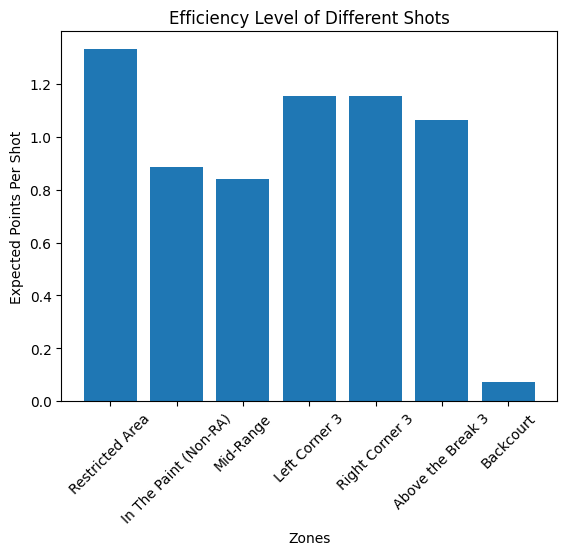

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:

new_1 = ['Restricted Area', 'In The Paint (Non-RA)', 'Mid-Range', 'Left Corner 3', 'Right Corner 3', 'Above the Break 3', 'Backcourt']
new_2 = [1.3325946786082514, 0.8872081242195047, 0.840916149068323, 1.1554310500632567, 1.1563537579233323, 1.0635209580838323, 0.07389162561576355]

# Plot the bar chart
plt.bar(new_1, new_2)

# Add labels and title
plt.xlabel('Zones')
plt.ylabel('Expected Points Per Shot')
plt.title('Efficiency Level of Different Shots')

# Rotate the x-axis labels if desired
plt.xticks(rotation=45)

# Show the plot
plt.show()

plt.savefig('Zone_Histogram.png')
from google.colab import files
files.download('Zone_Histogram.png')

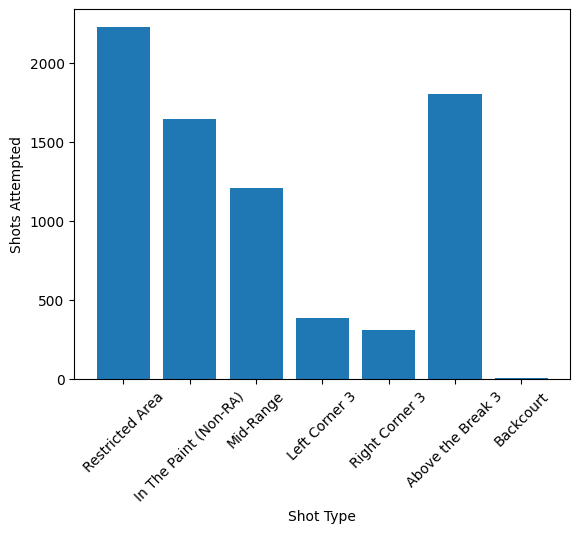

In [ ]:
plt.bar(new_1, NBAdf['FGA']);
plt.xlabel('Shot Type')
plt.ylabel('Shots Attempted')
plt.xticks(rotation=45);